# Longitudinal Origin-Destination Employment Statistics (LODES)

*Source: https://lehd.ces.census.gov/data/*

*LODES Data provides detailed spatial distributions of workers' employment and residential locations and the relation between the two at the Census Block level. LODES also provides characteristic detail on age, earnings, industry distributions, and local workforce indicators.*

*See more info here: https://lehd.ces.census.gov/data/lodes/LODES7/LODESTechDoc7.0.pdf *

## 1) Download the LODES data

Navigate to: https://lehd.ces.census.gov/data/lodes/LODES7/ny/od/ny_od_main_JT00_2015.csv.gz

The file should start downloading automatically. When it finishes downloading, extract the csv and place it in the same directory as this notebook.

## 2) Inspect the LODES data

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/ny_od_main_JT00_2015.csv")

In [4]:
df.head()

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,360010001001004,360010130001011,1,0,1,0,0,0,1,0,0,1,20170919
1,360010001001004,360010135063013,1,0,0,1,0,0,1,0,1,0,20170919
2,360010001001004,360010144022021,1,0,1,0,0,0,1,0,1,0,20170919
3,360010001001004,360390802013013,1,0,1,0,0,0,1,0,0,1,20170919
4,360010001001004,360650264001002,1,0,1,0,0,0,1,0,1,0,20170919


In [5]:
df.shape

(7416172, 13)

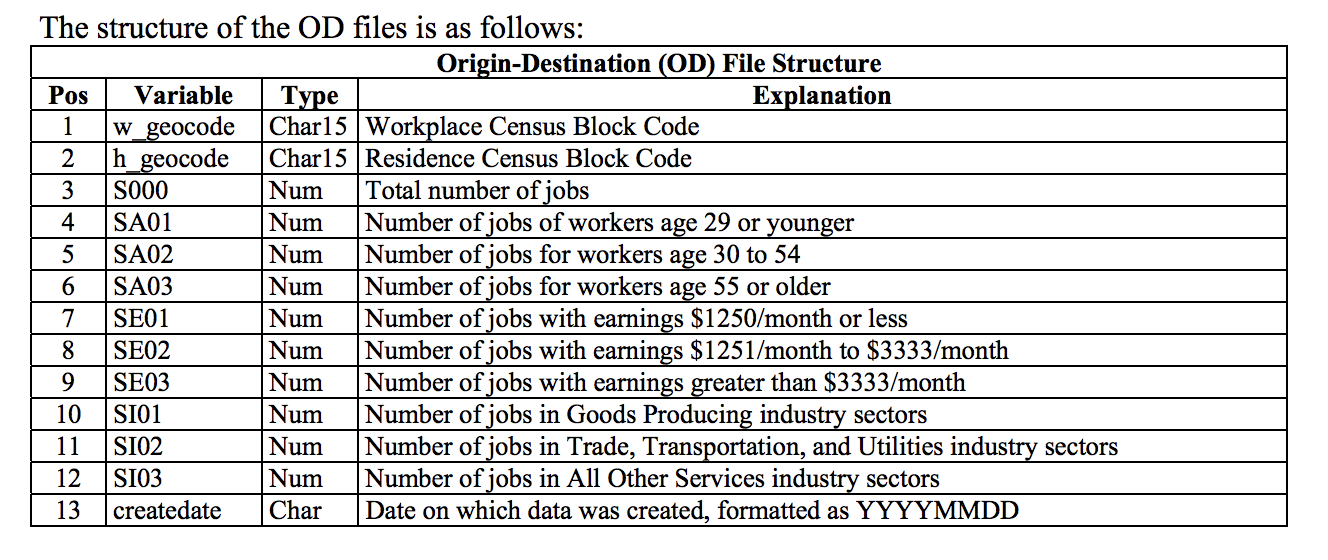

In [6]:
from IPython.display import Image
Image("https://i.imgur.com/5lCkM9V.png")

## 3) Download census block geography data

Download and unzip this file containing geography for New York State: https://lehd.ces.census.gov/data/lodes/LODES7/ny/ny_xwalk.csv.gz

In [8]:
census_blocks = pd.read_csv("../data/ny_xwalk.csv")

/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (27,28,29,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
census_blocks.head()

,tabblk2010,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,...,stanrcname,necta,nectaname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate
0,360010001001000,36,NY,New York,36001,"Albany County, NY",36001000100,"1 (Albany, NY)",360010001001,"1 (Tract 1, Albany, NY)",...,NaN,99999,NaN,9999999999999999999999,NaN,36360051,Albany/Rensselaer/Schenectady LWIA,42.669254,-73.726498,20170919
1,360010001001001,36,NY,New York,36001,"Albany County, NY",36001000100,"1 (Albany, NY)",360010001001,"1 (Tract 1, Albany, NY)",...,NaN,99999,NaN,9999999999999999999999,NaN,36360051,Albany/Rensselaer/Schenectady LWIA,42.669897,-73.728149,20170919
2,360010001001002,36,NY,New York,36001,"Albany County, NY",36001000100,"1 (Albany, NY)",360010001001,"1 (Tract 1, Albany, NY)",...,NaN,99999,NaN,9999999999999999999999,NaN,36360051,Albany/Rensselaer/Schenectady LWIA,42.667434,-73.733070,20170919
3,360010001001003,36,NY,New York,36001,"Albany County, NY",36001000100,"1 (Albany, NY)",360010001001,"1 (Tract 1, Albany, NY)",...,NaN,99999,NaN,9999999999999999999999,NaN,36360051,Albany/Rensselaer/Schenectady LWIA,42.668937,-73.730992,20170919
4,360010001001004,36,NY,New York,36001,"Albany County, NY",36001000100,"1 (Albany, NY)",360010001001,"1 (Tract 1, Albany, NY)",...,NaN,99999,NaN,9999999999999999999999,NaN,36360051,Albany/Rensselaer/Schenectady LWIA,42.672326,-73.731422,20170919


## 4) Merge LODES data with census block geographies

In [10]:
df = pd.merge(df, census_blocks[['tabblk2010', 'blklatdd', 'blklondd', 'ctyname']], how='left', left_on='h_geocode', right_on='tabblk2010')
df.rename(columns={'blklatdd': 'origin_lat', 'blklondd': 'origin_lon', 'ctyname': 'origin_county'}, inplace=True)
del df['tabblk2010']

In [11]:
df = pd.merge(df, census_blocks[['tabblk2010', 'blklatdd', 'blklondd', 'ctyname']], how='left', left_on='w_geocode', right_on='tabblk2010')
df.rename(columns={'blklatdd': 'dest_lat', 'blklondd': 'dest_lon', 'ctyname': 'dest_county'}, inplace=True)
del df['tabblk2010']

In [12]:
df.head()

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate,origin_lat,origin_lon,origin_county,dest_lat,dest_lon,dest_county
0,360010001001004,360010130001011,1,0,1,0,0,0,1,0,0,1,20170919,42.787522,-73.726523,"Albany County, NY",42.672326,-73.731422,"Albany County, NY"
1,360010001001004,360010135063013,1,0,0,1,0,0,1,0,1,0,20170919,42.749987,-73.754562,"Albany County, NY",42.672326,-73.731422,"Albany County, NY"
2,360010001001004,360010144022021,1,0,1,0,0,0,1,0,1,0,20170919,42.474572,-73.815492,"Albany County, NY",42.672326,-73.731422,"Albany County, NY"
3,360010001001004,360390802013013,1,0,1,0,0,0,1,0,0,1,20170919,42.402670,-73.964972,"Greene County, NY",42.672326,-73.731422,"Albany County, NY"
4,360010001001004,360650264001002,1,0,1,0,0,0,1,0,1,0,20170919,43.096008,-75.236223,"Oneida County, NY",42.672326,-73.731422,"Albany County, NY"


## 5) Filter the data to New York City bounding box

In [13]:
bbox = -74.803162,40.350731,-72.913513,41.236511

In [14]:
west, south, east, north = bbox

In [15]:
condition1 = (df['origin_lon'] >= west) & (df['origin_lon'] <= east) & \
             (df['origin_lat'] >= south) & (df['origin_lat'] <= north)

condition2 = (df['dest_lon'] >= west) & (df['dest_lon'] <= east) & \
             (df['dest_lat'] >= south) & (df['dest_lat'] <= north)

In [16]:
df = df[condition1 & condition2]

In [17]:
df.shape

(4420277, 19)

## 6) Create LineString objects

Here we will create a LineString object for each row using the Well-Known Text format. See more here: https://en.wikipedia.org/wiki/Well-known_text

In [19]:
%time
df['linestring'] = "LINESTRING(" + df['origin_lon'].astype(str) + " " + \
                    df['origin_lat'].astype(str) + ", " + \
                    df['dest_lon'].astype(str) + " " + \
                    df['dest_lat'].astype(str) + ")"

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [20]:
df.head()

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate,origin_lat,origin_lon,origin_county,dest_lat,dest_lon,dest_county,linestring
215423,360050001001002,360050002001003,1,1,0,0,0,1,0,0,0,1,20170919,40.813789,-73.862623,"Bronx County, NY",40.792936,-73.881206,"Bronx County, NY","LINESTRING(-73.8626235 40.8137886, -73.8812064..."
215424,360050001001002,360050002002006,2,0,2,0,0,0,2,0,0,2,20170919,40.813575,-73.863493,"Bronx County, NY",40.792936,-73.881206,"Bronx County, NY","LINESTRING(-73.86349270000001 40.8135752, -73...."
215425,360050001001002,360050002003025,1,1,0,0,1,0,0,0,0,1,20170919,40.806060,-73.857360,"Bronx County, NY",40.792936,-73.881206,"Bronx County, NY","LINESTRING(-73.8573601 40.8060597, -73.8812064..."
215426,360050001001002,360050004001000,1,0,1,0,1,0,0,0,0,1,20170919,40.814544,-73.857033,"Bronx County, NY",40.792936,-73.881206,"Bronx County, NY","LINESTRING(-73.8570334 40.81454420000001, -73...."
215427,360050001001002,360050004004001,1,0,1,0,0,0,1,0,0,1,20170919,40.813857,-73.848392,"Bronx County, NY",40.792936,-73.881206,"Bronx County, NY","LINESTRING(-73.8483918 40.813857299999995, -73..."


## 7) Sample 10,000 rows and save dataframe to csv

In [21]:
sample_df = df.sample(n=10000)
sample_df.to_csv("../data/NYC_sample_10000.csv")